# PART A
#Business Problem
A FMCG company has entered into the instant noodles business two years back. Their higher 
management has notices that there is a miss match in the demand and supply. Where the demand is 
high, supply is pretty low and where the demand is low, supply is pretty high. In both the ways it is an 
inventory cost loss to the company; hence, the higher management wants to optimize the supply 
quantity in each and every warehouse in entire country.
#Goal & Objective: 
The objective of this exercise is to build a model, using historical data that will 
determine an optimum weight of the product to be shipped each time to the warehouse.
Also try to analysis the demand pattern in different pockets of the country so management can drive 
the advertisement campaign particular in those pockets.
This is the first phase of the agreement; hence, company has shared very limited information. Once 
you are able to showcase a tangible impact with this much of information then company will open the 
360 degree data lake for your consulting company to build a more robust model.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV

In [ ]:
sns.set()
sns.set_palette(palette='deep')
import folium
from folium.plugins import FastMarkerCluster #For Interactive Maps of World

In [ ]:
# import os
# os.chdir('C:\\GL Class\\Solution Preparation\EDA')
listings= pd.read_csv('/content/Data.csv')
listings.head()

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req,transport_issue,Competitor_in_mkt,retail_shop_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown,govt_check,product_wg_ton
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,4651,...,1,91,29.0,NaN,13,0,A,5,15,17115
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,6217,...,1,210,31.0,NaN,4,0,A,3,17,5074
2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,4306,...,0,161,37.0,NaN,17,0,A,6,22,23137
3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,6000,...,0,103,21.0,NaN,17,1,A+,3,27,22115
4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,4740,...,1,112,25.0,2009.0,18,0,C,6,24,24071


In [ ]:
pd.options.display.max_columns = None

In [ ]:
listings.head()

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req,transport_issue,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown,govt_check,product_wg_ton
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,4651,Rented,24,0,1,1,91,29.0,NaN,13,0,A,5,15,17115
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,6217,Company Owned,47,0,0,1,210,31.0,NaN,4,0,A,3,17,5074
2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,4306,Company Owned,64,0,0,0,161,37.0,NaN,17,0,A,6,22,23137
3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,6000,Rented,50,0,0,0,103,21.0,NaN,17,1,A+,3,27,22115
4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,4740,Company Owned,42,1,0,1,112,25.0,2009.0,18,0,C,6,24,24071


In [ ]:
## Checking the shape of the data: Number of columns and rows

listings.shape

(25000, 24)

In [ ]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 25000 non-null  object 
 1   WH_Manager_ID                 25000 non-null  object 
 2   Location_type                 25000 non-null  object 
 3   WH_capacity_size              25000 non-null  object 
 4   zone                          25000 non-null  object 
 5   WH_regional_zone              25000 non-null  object 
 6   num_refill_req                25000 non-null  int64  
 7   transport_issue               25000 non-null  int64  
 8   Competitor_in_mkt             25000 non-null  int64  
 9   retail_shop_num               25000 non-null  int64  
 10  wh_owner_type                 25000 non-null  object 
 11  distributor_num               25000 non-null  int64  
 12  flood_impacted                25000 non-null  int64  
 13  f

In [ ]:
### Examine missing values   What is standard practice of dropping Nan Valus????
listings_na = listings.isna().sum()
listings_na[listings_na.values > 0].sort_values(ascending=False) # Find out all variables that contain missing values

wh_est_year                     11881
workers_num                       990
approved_wh_govt_certificate      908
dtype: int64

In [ ]:
#Target Variable Analysis

In [ ]:
### Let's examine the target column which is product_wg_ton

listings.describe(include="all")["product_wg_ton"]

count     25000.000000
unique             NaN
top                NaN
freq               NaN
mean      22102.632920
std       11607.755077
min        2065.000000
25%       13059.000000
50%       22101.000000
75%       30103.000000
max       55151.000000
Name: product_wg_ton, dtype: float64

In [ ]:
#Let's look at the distribution of price at different percentiles
print("0.5% properties have a product_wg_ton lower than {0: .2f}".format(np.percentile(listings["product_wg_ton"], 0.5)))
print("  1% properties have a product_wg_ton lower than {0: .2f}".format(np.percentile(listings["product_wg_ton"], 1)))
print("  5% properties have a product_wg_ton lower than {0: .2f}".format(np.percentile(listings["product_wg_ton"], 5)))
print(" 10% properties have a product_wg_ton lower than {0: .2f}".format(np.percentile(listings["product_wg_ton"], 10)))
print(" 90% properties have a product_wg_ton lower than {0: .2f}".format(np.percentile(listings["product_wg_ton"], 90)))
print(" 95% properties have a product_wg_ton lower than {0: .2f}".format(np.percentile(listings["product_wg_ton"], 95)))
print(" 99% properties have a product_wg_ton lower than {0: .2f}".format(np.percentile(listings["product_wg_ton"], 99)))
print("99.5% properties have a product_wg_ton lower than {0: .2f}".format(np.percentile(listings["product_wg_ton"], 99.5)))

0.5% properties have a product_wg_ton lower than  3090.99
  1% properties have a product_wg_ton lower than  3130.00
  5% properties have a product_wg_ton lower than  5128.00
 10% properties have a product_wg_ton lower than  6134.00
 90% properties have a product_wg_ton lower than  37147.00
 95% properties have a product_wg_ton lower than  43113.00
 99% properties have a product_wg_ton lower than  51075.02
99.5% properties have a product_wg_ton lower than  52117.01


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


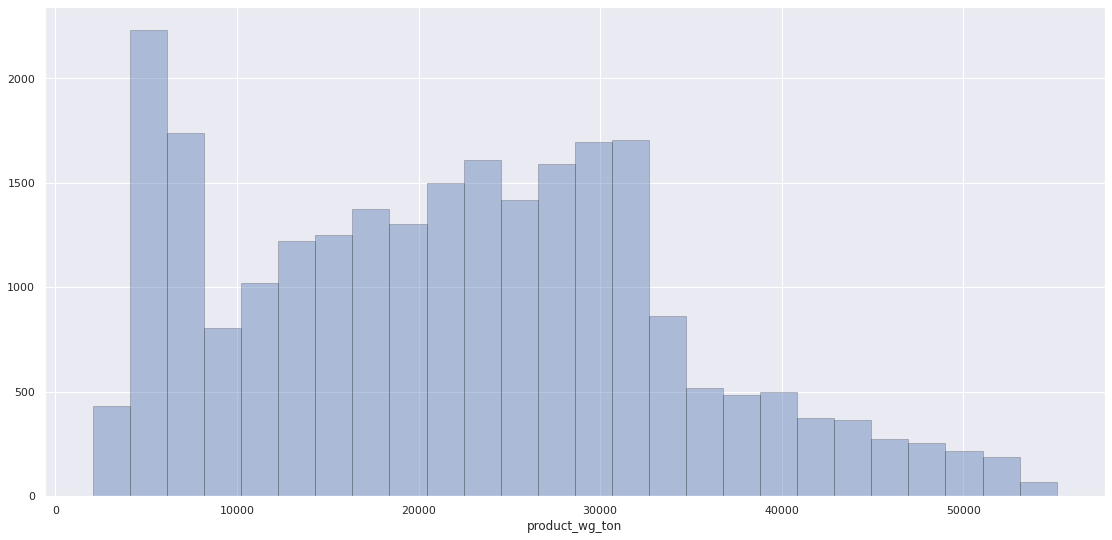

In [ ]:
plt.figure(figsize=(19,9))
sns.distplot(listings["product_wg_ton"],bins = 26,kde = False,color = 'b',hist_kws = {'linewidth' : 0.5,'edgecolor' : 'black'})

In [ ]:
#Log transformation of target variable

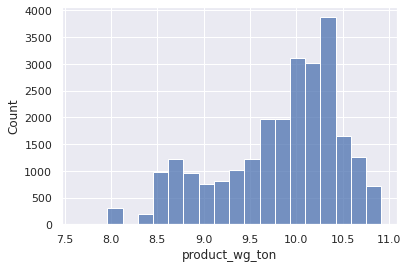

In [ ]:
sns.histplot(np.log(listings["product_wg_ton"]),bins=20);

In [ ]:
listings["flood_impacted"]=listings["flood_impacted"].astype(np.object)
listings["flood_proof"]=listings["flood_proof"].astype(np.object)
listings["electric_supply"]=listings["electric_supply"].astype(np.object)
listings["temp_reg_mach"]=listings["temp_reg_mach"].astype(np.object)

<ipython-input-18-28df6a01928b>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  listings["flood_impacted"]=listings["flood_impacted"].astype(np.object)
<ipython-input-18-28df6a01928b>:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  listings["flood_proof"]=listings["flood_proof"].astype(np.object)
<ipython-input-18-28df6a01928b>:3: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this wil

In [ ]:
listings.isnull().sum()

Ware_house_ID                       0
WH_Manager_ID                       0
Location_type                       0
WH_capacity_size                    0
zone                                0
WH_regional_zone                    0
num_refill_req                      0
transport_issue                     0
Competitor_in_mkt                   0
retail_shop_num                     0
wh_owner_type                       0
distributor_num                     0
flood_impacted                      0
flood_proof                         0
electric_supply                     0
dist_from_hub                       0
workers_num                       990
wh_est_year                     11881
storage_issue_reported              0
temp_reg_mach                       0
approved_wh_govt_certificate      908
wh_breakdown                        0
govt_check                          0
product_wg_ton                      0
dtype: int64

In [ ]:
for column in listings[['workers_num', 'wh_est_year']]:
    median = listings[column].median()
    listings[column] = listings[column].fillna(median)

Adding New Feature Duration of Estblished Warehouse Years 

In [ ]:
listings["Current_Year"] = 2023

In [ ]:
listings["Dur_Wh_Est_Year"] = listings["Current_Year"]-listings["wh_est_year"]

In [ ]:
listings.describe().T

,count,mean,std,min,25%,50%,75%,max
num_refill_req,25000.0,4.08904,2.606612,0.0,2.0,4.0,6.0,8.0
transport_issue,25000.0,0.77368,1.199449,0.0,0.0,0.0,1.0,5.0
Competitor_in_mkt,25000.0,3.10420,1.141663,0.0,2.0,3.0,4.0,12.0
retail_shop_num,25000.0,4985.71156,1052.825252,1821.0,4313.0,4859.0,5500.0,11008.0
distributor_num,25000.0,42.41812,16.064329,15.0,29.0,42.0,56.0,70.0
dist_from_hub,25000.0,163.53732,62.718609,55.0,109.0,164.0,218.0,271.0
workers_num,25000.0,28.90700,7.717275,10.0,24.0,28.0,33.0,98.0
wh_est_year,25000.0,2009.20108,5.456731,1996.0,2009.0,2009.0,2010.0,2023.0
storage_issue_reported,25000.0,17.13044,9.161108,0.0,10.0,18.0,24.0,39.0
wh_breakdown,25000.0,3.48204,1.690335,0.0,2.0,3.0,5.0,6.0


In [ ]:
listings.drop('Current_Year',
  axis='columns', inplace=True)

In [ ]:
listings.drop('wh_est_year',
  axis='columns', inplace=True)

In [ ]:
cat = []
num = []
for i in listings.columns:
    if listings[i].dtype == 'object':
        cat.append(i)
    else:
        num.append(i)
print(cat)
print(num)
x_num=listings[num]
y_cat=listings[cat]

['Ware_house_ID', 'WH_Manager_ID', 'Location_type', 'WH_capacity_size', 'zone', 'WH_regional_zone', 'wh_owner_type', 'flood_impacted', 'flood_proof', 'electric_supply', 'temp_reg_mach', 'approved_wh_govt_certificate']
['num_refill_req', 'transport_issue', 'Competitor_in_mkt', 'retail_shop_num', 'distributor_num', 'dist_from_hub', 'workers_num', 'storage_issue_reported', 'wh_breakdown', 'govt_check', 'product_wg_ton', 'Dur_Wh_Est_Year']


In [ ]:
# Write Assumption of ANOVA-shapiro for normality
# Levene for Variance

In [ ]:
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA

In [ ]:
formula = 'product_wg_ton ~ C(approved_wh_govt_certificate)'
model = ols(formula, listings).fit()
aov_table = anova_lm(model)
print(aov_table)

                                      df        sum_sq       mean_sq  \
C(approved_wh_govt_certificate)      4.0  1.117469e+11  2.793672e+10   
Residual                         24087.0  2.988157e+12  1.240568e+08   

                                          F         PR(>F)  
C(approved_wh_govt_certificate)  225.192881  4.048325e-190  
Residual                                NaN            NaN  


In [ ]:
formula = 'product_wg_ton ~ C(temp_reg_mach)'
model = ols(formula, listings).fit()
aov_table = anova_lm(model)
print(aov_table)

                       df        sum_sq       mean_sq           F  \
C(temp_reg_mach)      1.0  3.479598e+10  3.479598e+10  260.930561   
Residual          24998.0  3.333569e+12  1.333534e+08         NaN   

                        PR(>F)  
C(temp_reg_mach)  2.126171e-58  
Residual                   NaN  


In [ ]:
formula = 'product_wg_ton ~ C(electric_supply)'
model = ols(formula, listings).fit()
aov_table = anova_lm(model)
print(aov_table)

                         df        sum_sq       mean_sq         F    PR(>F)
C(electric_supply)      1.0  1.571268e+07  1.571268e+07  0.116611  0.732743
Residual            24998.0  3.368349e+12  1.347447e+08       NaN       NaN


In [ ]:
formula = 'product_wg_ton ~ C(flood_proof)'
model = ols(formula, listings).fit()
aov_table = anova_lm(model)
print(aov_table)

                     df        sum_sq       mean_sq         F    PR(>F)
C(flood_proof)      1.0  6.564515e+05  6.564515e+05  0.004872  0.944355
Residual        24998.0  3.368364e+12  1.347453e+08       NaN       NaN


In [ ]:
formula = 'product_wg_ton ~ C(flood_impacted)'
model = ols(formula, listings).fit()
aov_table = anova_lm(model)
print(aov_table)

                        df        sum_sq       mean_sq         F    PR(>F)
C(flood_impacted)      1.0  1.780221e+07  1.780221e+07  0.132118  0.716249
Residual           24998.0  3.368347e+12  1.347447e+08       NaN       NaN


In [ ]:
formula = 'product_wg_ton ~ C(wh_owner_type)'
model = ols(formula, listings).fit()
aov_table = anova_lm(model)
print(aov_table)

                       df        sum_sq       mean_sq        F    PR(>F)
C(wh_owner_type)      1.0  1.135892e+08  1.135892e+08  0.84302  0.358543
Residual          24998.0  3.368251e+12  1.347408e+08      NaN       NaN


In [ ]:
formula = 'product_wg_ton ~ C(WH_regional_zone)'
model = ols(formula, listings).fit()
aov_table = anova_lm(model)
print(aov_table)

                          df        sum_sq       mean_sq         F    PR(>F)
C(WH_regional_zone)      5.0  7.713408e+08  1.542682e+08  1.144966  0.333954
Residual             24994.0  3.367593e+12  1.347361e+08       NaN       NaN


In [ ]:
formula = 'product_wg_ton ~ C(zone)'
model = ols(formula, listings).fit()
aov_table = anova_lm(model)
print(aov_table)

               df        sum_sq       mean_sq         F    PR(>F)
C(zone)       3.0  4.468839e+08  1.489613e+08  1.105561  0.345349
Residual  24996.0  3.367918e+12  1.347383e+08       NaN       NaN


In [ ]:
formula = 'product_wg_ton ~ C(WH_capacity_size)'
model = ols(formula, listings).fit()
aov_table = anova_lm(model)
print(aov_table)

                          df        sum_sq       mean_sq         F    PR(>F)
C(WH_capacity_size)      2.0  2.979142e+08  1.489571e+08  1.105525  0.331053
Residual             24997.0  3.368067e+12  1.347388e+08       NaN       NaN


In [ ]:
formula = 'product_wg_ton ~ C(Location_type)'
model = ols(formula, listings).fit()
aov_table = anova_lm(model)
print(aov_table)

                       df        sum_sq       mean_sq           F  \
C(Location_type)      1.0  1.872875e+10  1.872875e+10  139.770772   
Residual          24998.0  3.349636e+12  1.339962e+08         NaN   

                        PR(>F)  
C(Location_type)  3.639843e-32  
Residual                   NaN  


In [ ]:
from scipy import stats

In [ ]:
x_num.describe()

,num_refill_req,transport_issue,Competitor_in_mkt,retail_shop_num,distributor_num,dist_from_hub,workers_num,storage_issue_reported,wh_breakdown,govt_check,product_wg_ton,Dur_Wh_Est_Year
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,4.089040,0.773680,3.104200,4985.711560,42.418120,163.537320,28.907000,17.130440,3.482040,18.812280,22102.632920,13.798920
std,2.606612,1.199449,1.141663,1052.825252,16.064329,62.718609,7.717275,9.161108,1.690335,8.632382,11607.755077,5.456731
min,0.000000,0.000000,0.000000,1821.000000,15.000000,55.000000,10.000000,0.000000,0.000000,1.000000,2065.000000,0.000000
25%,2.000000,0.000000,2.000000,4313.000000,29.000000,109.000000,24.000000,10.000000,2.000000,11.000000,13059.000000,13.000000
50%,4.000000,0.000000,3.000000,4859.000000,42.000000,164.000000,28.000000,18.000000,3.000000,21.000000,22101.000000,14.000000
75%,6.000000,1.000000,4.000000,5500.000000,56.000000,218.000000,33.000000,24.000000,5.000000,26.000000,30103.000000,14.000000
max,8.000000,5.000000,12.000000,11008.000000,70.000000,271.000000,98.000000,39.000000,6.000000,32.000000,55151.000000,27.000000


In [ ]:
Skewness = pd.DataFrame({'Skewness' : [stats.skew(listings.product_wg_ton),stats.skew(listings.Dur_Wh_Est_Year),stats.skew(listings.govt_check),
                                       stats.skew(listings.storage_issue_reported),stats.skew(listings.workers_num),stats.skew(listings.dist_from_hub),
                                       stats.skew(listings.distributor_num),stats.skew(listings.retail_shop_num),stats.skew(listings.Competitor_in_mkt)
                                       ,stats.skew(listings.transport_issue),stats.skew(listings.num_refill_req)]},
                        index=['product_wg_ton','Dur_Wh_Est_Year','govt_check','storage_issue_reported','workers_num','dist_from_hub','distributor_num'
                        ,'retail_shop_num','Competitor_in_mkt','transport_issue','num_refill_req'])  # Measure the skeweness of the required columns
Skewness

,Skewness
product_wg_ton,0.331611
Dur_Wh_Est_Year,-0.117099
govt_check,-0.363240
storage_issue_reported,0.113338
workers_num,1.095016
dist_from_hub,-0.005998
distributor_num,0.015212
retail_shop_num,0.908247
Competitor_in_mkt,0.978397
transport_issue,1.610810


In [ ]:
stats.shapiro(listings['product_wg_ton'])

/usr/local/lib/python3.8/dist-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9705008864402771, pvalue=0.0)

In [ ]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 25000 non-null  object 
 1   WH_Manager_ID                 25000 non-null  object 
 2   Location_type                 25000 non-null  object 
 3   WH_capacity_size              25000 non-null  object 
 4   zone                          25000 non-null  object 
 5   WH_regional_zone              25000 non-null  object 
 6   num_refill_req                25000 non-null  int64  
 7   transport_issue               25000 non-null  int64  
 8   Competitor_in_mkt             25000 non-null  int64  
 9   retail_shop_num               25000 non-null  int64  
 10  wh_owner_type                 25000 non-null  object 
 11  distributor_num               25000 non-null  int64  
 12  flood_impacted                25000 non-null  object 
 13  f

In [ ]:
for column in ['approved_wh_govt_certificate']:
    listings[column].fillna(listings[column].mode()[0],inplace = True)

In [ ]:
dups = listings.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))


Number of duplicate rows = 0


In [ ]:
x_num.describe()

,num_refill_req,transport_issue,Competitor_in_mkt,retail_shop_num,distributor_num,dist_from_hub,workers_num,storage_issue_reported,wh_breakdown,govt_check,product_wg_ton,Dur_Wh_Est_Year
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,4.089040,0.773680,3.104200,4985.711560,42.418120,163.537320,28.907000,17.130440,3.482040,18.812280,22102.632920,13.798920
std,2.606612,1.199449,1.141663,1052.825252,16.064329,62.718609,7.717275,9.161108,1.690335,8.632382,11607.755077,5.456731
min,0.000000,0.000000,0.000000,1821.000000,15.000000,55.000000,10.000000,0.000000,0.000000,1.000000,2065.000000,0.000000
25%,2.000000,0.000000,2.000000,4313.000000,29.000000,109.000000,24.000000,10.000000,2.000000,11.000000,13059.000000,13.000000
50%,4.000000,0.000000,3.000000,4859.000000,42.000000,164.000000,28.000000,18.000000,3.000000,21.000000,22101.000000,14.000000
75%,6.000000,1.000000,4.000000,5500.000000,56.000000,218.000000,33.000000,24.000000,5.000000,26.000000,30103.000000,14.000000
max,8.000000,5.000000,12.000000,11008.000000,70.000000,271.000000,98.000000,39.000000,6.000000,32.000000,55151.000000,27.000000


In [ ]:
y_cat.describe(include='all')

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,wh_owner_type,flood_impacted,flood_proof,electric_supply,temp_reg_mach,approved_wh_govt_certificate
count,25000,25000,25000,25000,25000,25000,25000,25000,25000,25000,25000,24092
unique,25000,25000,2,3,4,6,2,2,2,2,2,5
top,WH_100000,EID_50000,Rural,Large,North,Zone 6,Company Owned,0,0,1,0,C
freq,1,1,22957,10169,10278,8339,13578,22546,23634,16422,17418,5501


<Figure size 1368x864 with 0 Axes>

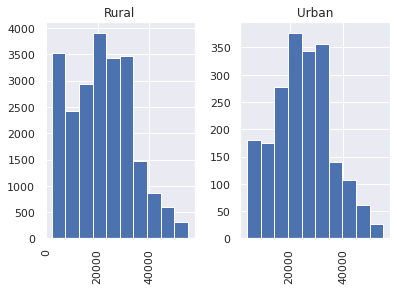

In [ ]:
plt.figure(figsize=(19,12))
listings.hist(by='Location_type',column = 'product_wg_ton');

<Figure size 1368x864 with 0 Axes>

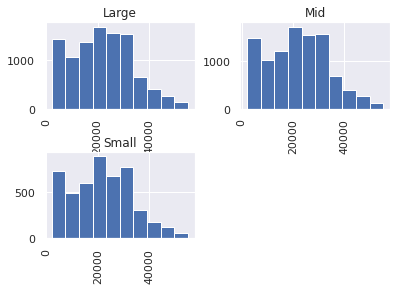

In [ ]:
plt.figure(figsize=(19,12))
listings.hist(by='WH_capacity_size',column = 'product_wg_ton');

<Figure size 1368x864 with 0 Axes>

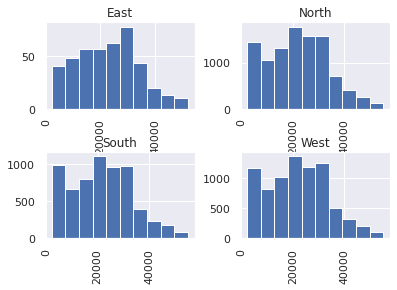

In [ ]:
plt.figure(figsize=(19,12))
listings.hist(by='zone',column = 'product_wg_ton');

<Figure size 1368x864 with 0 Axes>

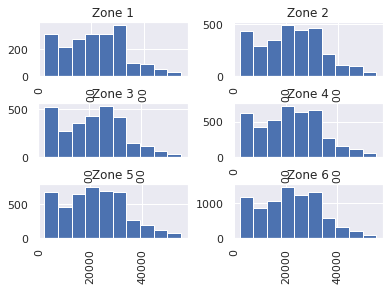

In [ ]:
plt.figure(figsize=(19,12))
listings.hist(by='WH_regional_zone',column = 'product_wg_ton');

<Figure size 1368x864 with 0 Axes>

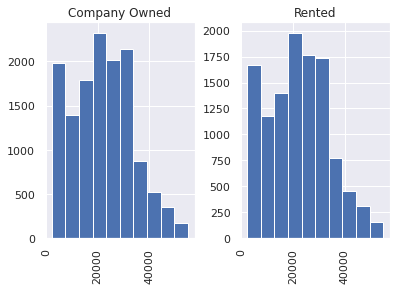

In [ ]:
plt.figure(figsize=(19,12))
listings.hist(by='wh_owner_type',column = 'product_wg_ton');

<Figure size 1368x864 with 0 Axes>

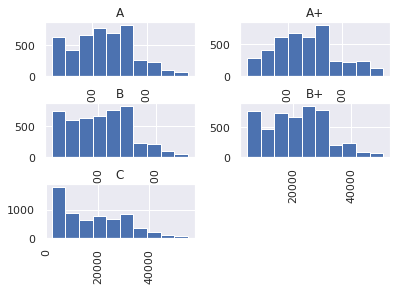

In [ ]:
plt.figure(figsize=(19,12))
listings.hist(by='approved_wh_govt_certificate',column = 'product_wg_ton');

In [ ]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(x_num[column].describe(),end=' ')
    
    
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.distplot(x_num[column], kde=False, color='g');
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=x_num[column])
    plt.show()

In [ ]:
df_num = listings.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(df_num.columns.values)
len(lstnumericcolumns)

12

In [ ]:
listings.Dur_Wh_Est_Year.describe()

count    25000.000000
mean        13.798920
std          5.456731
min          0.000000
25%         13.000000
50%         14.000000
75%         14.000000
max         27.000000
Name: Dur_Wh_Est_Year, dtype: float64

Description of num_refill_req
----------------------------------------------------------------------------
count    25000.000000
mean         4.089040
std          2.606612
min          0.000000
25%          2.000000
50%          4.000000
75%          6.000000
max          8.000000
Name: num_refill_req, dtype: float64 Distribution of num_refill_req
----------------------------------------------------------------------------


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


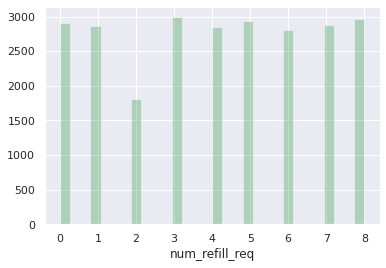

BoxPlot of num_refill_req
----------------------------------------------------------------------------


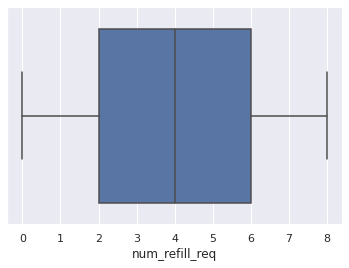

Description of transport_issue
----------------------------------------------------------------------------
count    25000.000000
mean         0.773680
std          1.199449
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: transport_issue, dtype: float64 Distribution of transport_issue
----------------------------------------------------------------------------


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


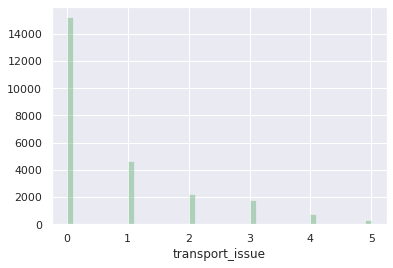

BoxPlot of transport_issue
----------------------------------------------------------------------------


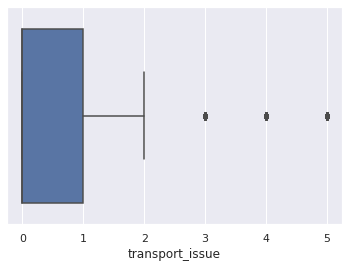

Description of Competitor_in_mkt
----------------------------------------------------------------------------
count    25000.000000
mean         3.104200
std          1.141663
min          0.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         12.000000
Name: Competitor_in_mkt, dtype: float64 Distribution of Competitor_in_mkt
----------------------------------------------------------------------------


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


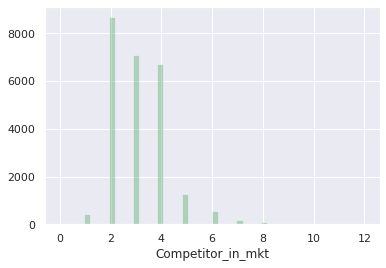

BoxPlot of Competitor_in_mkt
----------------------------------------------------------------------------


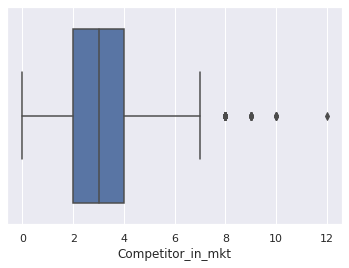

Description of retail_shop_num
----------------------------------------------------------------------------
count    25000.000000
mean      4985.711560
std       1052.825252
min       1821.000000
25%       4313.000000
50%       4859.000000
75%       5500.000000
max      11008.000000
Name: retail_shop_num, dtype: float64 Distribution of retail_shop_num
----------------------------------------------------------------------------


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


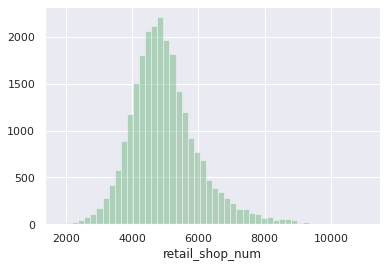

BoxPlot of retail_shop_num
----------------------------------------------------------------------------


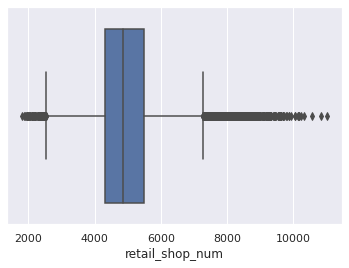

Description of distributor_num
----------------------------------------------------------------------------
count    25000.000000
mean        42.418120
std         16.064329
min         15.000000
25%         29.000000
50%         42.000000
75%         56.000000
max         70.000000
Name: distributor_num, dtype: float64 Distribution of distributor_num
----------------------------------------------------------------------------


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


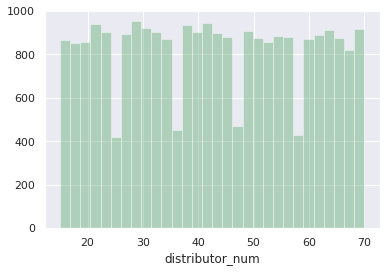

BoxPlot of distributor_num
----------------------------------------------------------------------------


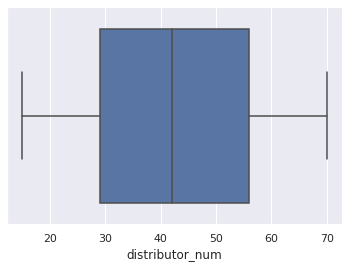

Description of dist_from_hub
----------------------------------------------------------------------------
count    25000.000000
mean       163.537320
std         62.718609
min         55.000000
25%        109.000000
50%        164.000000
75%        218.000000
max        271.000000
Name: dist_from_hub, dtype: float64 Distribution of dist_from_hub
----------------------------------------------------------------------------


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


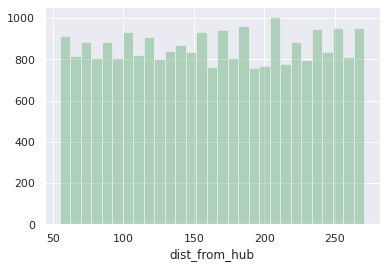

BoxPlot of dist_from_hub
----------------------------------------------------------------------------


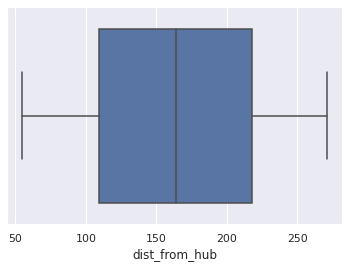

Description of workers_num
----------------------------------------------------------------------------
count    25000.000000
mean        28.907000
std          7.717275
min         10.000000
25%         24.000000
50%         28.000000
75%         33.000000
max         98.000000
Name: workers_num, dtype: float64 Distribution of workers_num
----------------------------------------------------------------------------


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


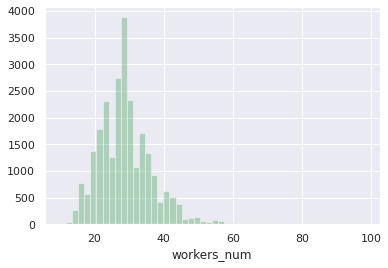

BoxPlot of workers_num
----------------------------------------------------------------------------


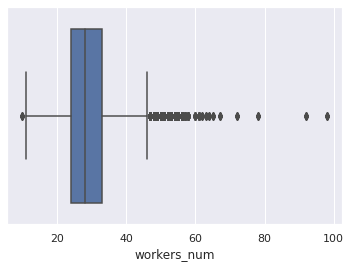

Description of storage_issue_reported
----------------------------------------------------------------------------
count    25000.000000
mean        17.130440
std          9.161108
min          0.000000
25%         10.000000
50%         18.000000
75%         24.000000
max         39.000000
Name: storage_issue_reported, dtype: float64 Distribution of storage_issue_reported
----------------------------------------------------------------------------


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


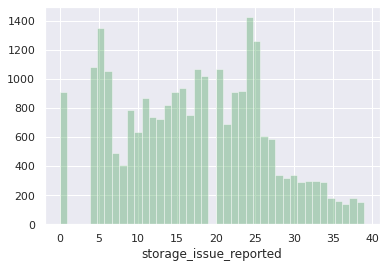

BoxPlot of storage_issue_reported
----------------------------------------------------------------------------


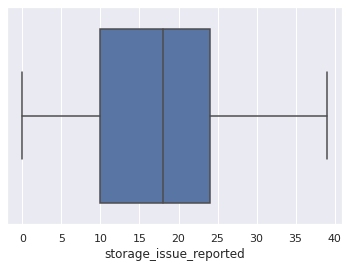

Description of wh_breakdown
----------------------------------------------------------------------------
count    25000.000000
mean         3.482040
std          1.690335
min          0.000000
25%          2.000000
50%          3.000000
75%          5.000000
max          6.000000
Name: wh_breakdown, dtype: float64 Distribution of wh_breakdown
----------------------------------------------------------------------------


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


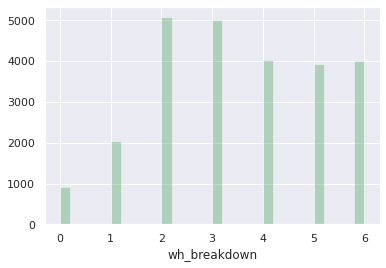

BoxPlot of wh_breakdown
----------------------------------------------------------------------------


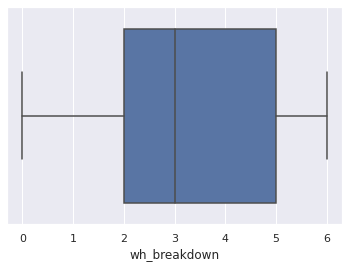

Description of govt_check
----------------------------------------------------------------------------
count    25000.000000
mean        18.812280
std          8.632382
min          1.000000
25%         11.000000
50%         21.000000
75%         26.000000
max         32.000000
Name: govt_check, dtype: float64 Distribution of govt_check
----------------------------------------------------------------------------


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


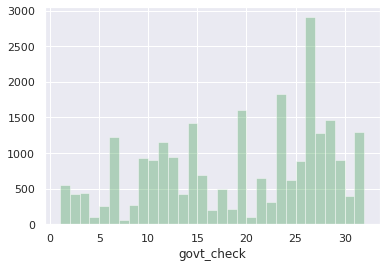

BoxPlot of govt_check
----------------------------------------------------------------------------


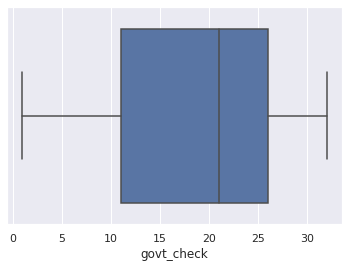

Description of product_wg_ton
----------------------------------------------------------------------------
count    25000.000000
mean     22102.632920
std      11607.755077
min       2065.000000
25%      13059.000000
50%      22101.000000
75%      30103.000000
max      55151.000000
Name: product_wg_ton, dtype: float64 Distribution of product_wg_ton
----------------------------------------------------------------------------


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


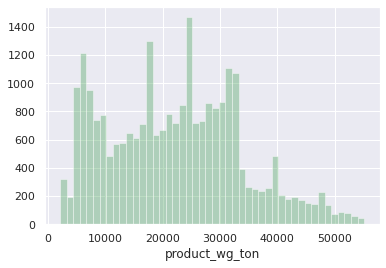

BoxPlot of product_wg_ton
----------------------------------------------------------------------------


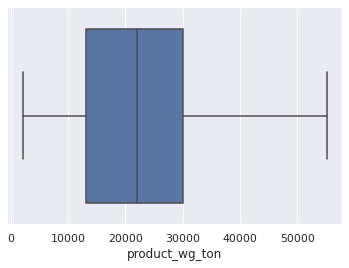

Description of Dur_Wh_Est_Year
----------------------------------------------------------------------------
count    25000.000000
mean        13.798920
std          5.456731
min          0.000000
25%         13.000000
50%         14.000000
75%         14.000000
max         27.000000
Name: Dur_Wh_Est_Year, dtype: float64 Distribution of Dur_Wh_Est_Year
----------------------------------------------------------------------------


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


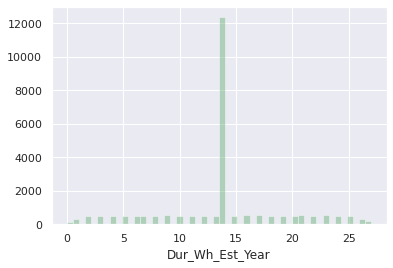

BoxPlot of Dur_Wh_Est_Year
----------------------------------------------------------------------------


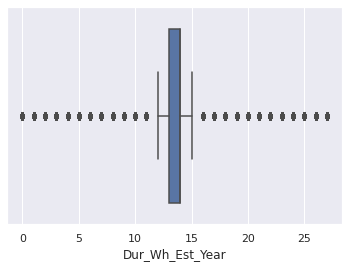

In [ ]:
for x in lstnumericcolumns:
    univariateAnalysis_numeric(x,20)

In [ ]:
def univariateAnalysis_category(cat_column):
    print("Details of " + cat_column)
    print("----------------------------------------------------------------")
    print(y_cat[cat_column].value_counts())
    plt.figure()
    y_cat[cat_column].value_counts().plot.bar(title="Frequency Distribution of " + cat_column)
    plt.show()
    print("       ")

In [ ]:
listings.drop(['WH_Manager_ID'], axis='columns', inplace=True)

In [ ]:
listings.drop(['Ware_house_ID'], axis='columns', inplace=True)

In [ ]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Location_type                 25000 non-null  object 
 1   WH_capacity_size              25000 non-null  object 
 2   zone                          25000 non-null  object 
 3   WH_regional_zone              25000 non-null  object 
 4   num_refill_req                25000 non-null  int64  
 5   transport_issue               25000 non-null  int64  
 6   Competitor_in_mkt             25000 non-null  int64  
 7   retail_shop_num               25000 non-null  int64  
 8   wh_owner_type                 25000 non-null  object 
 9   distributor_num               25000 non-null  int64  
 10  flood_impacted                25000 non-null  object 
 11  flood_proof                   25000 non-null  object 
 12  electric_supply               25000 non-null  object 
 13  d

In [ ]:
df_cat = listings.select_dtypes(include = ['object'])
lstcatcolumns = list(df_cat.columns.values)
lstcatcolumns

['Location_type',
 'WH_capacity_size',
 'zone',
 'WH_regional_zone',
 'wh_owner_type',
 'flood_impacted',
 'flood_proof',
 'electric_supply',
 'temp_reg_mach',
 'approved_wh_govt_certificate']

Details of Location_type
----------------------------------------------------------------
Rural    22957
Urban     2043
Name: Location_type, dtype: int64


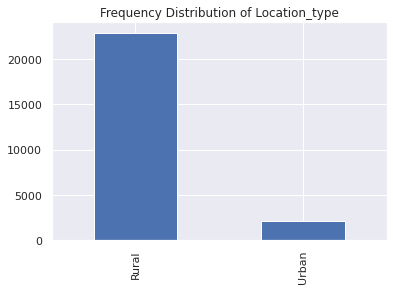

       
Details of WH_capacity_size
----------------------------------------------------------------
Large    10169
Mid      10020
Small     4811
Name: WH_capacity_size, dtype: int64


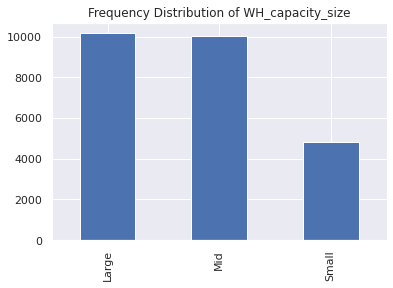

       
Details of zone
----------------------------------------------------------------
North    10278
West      7931
South     6362
East       429
Name: zone, dtype: int64


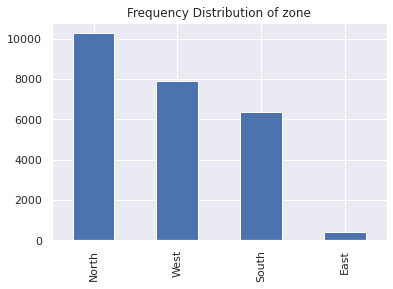

       
Details of WH_regional_zone
----------------------------------------------------------------
Zone 6    8339
Zone 5    4587
Zone 4    4176
Zone 2    2963
Zone 3    2881
Zone 1    2054
Name: WH_regional_zone, dtype: int64


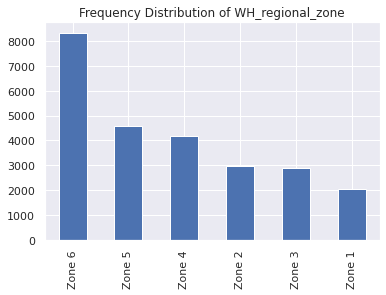

       
Details of wh_owner_type
----------------------------------------------------------------
Company Owned    13578
Rented           11422
Name: wh_owner_type, dtype: int64


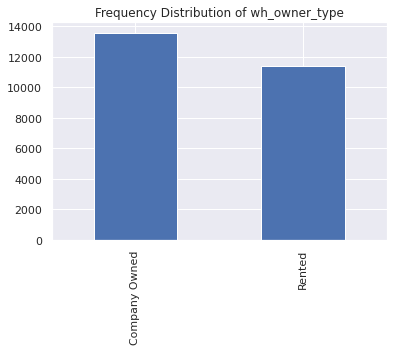

       
Details of flood_impacted
----------------------------------------------------------------
0    22546
1     2454
Name: flood_impacted, dtype: int64


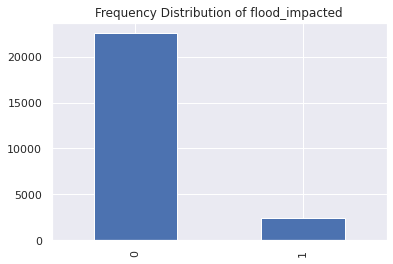

       
Details of flood_proof
----------------------------------------------------------------
0    23634
1     1366
Name: flood_proof, dtype: int64


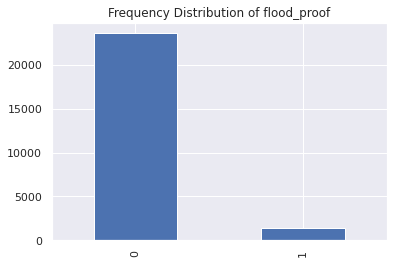

       
Details of electric_supply
----------------------------------------------------------------
1    16422
0     8578
Name: electric_supply, dtype: int64


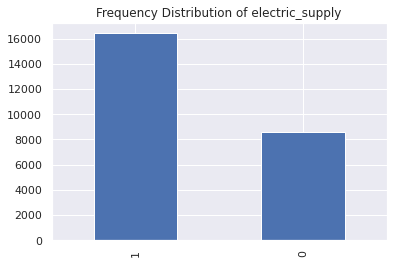

       
Details of temp_reg_mach
----------------------------------------------------------------
0    17418
1     7582
Name: temp_reg_mach, dtype: int64


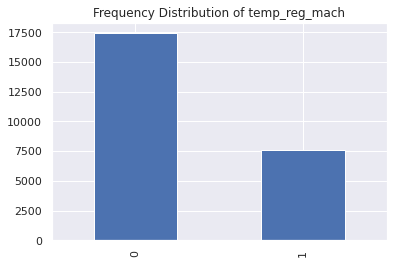

       
Details of approved_wh_govt_certificate
----------------------------------------------------------------
C     5501
B+    4917
B     4812
A     4671
A+    4191
Name: approved_wh_govt_certificate, dtype: int64


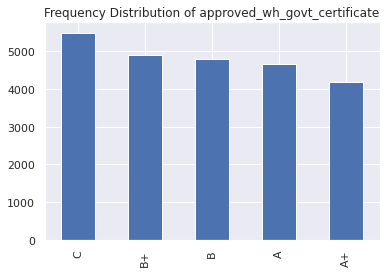

In [ ]:
for x in lstcatcolumns:
    univariateAnalysis_category(x)

In [ ]:
#Bivariate Analysis

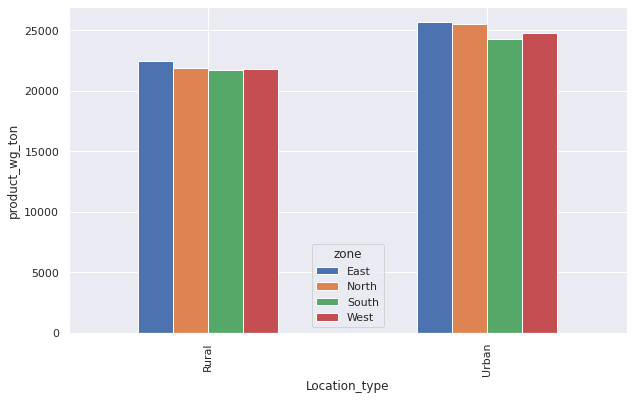

In [ ]:
ct = pd.crosstab(index = listings['Location_type'],columns=listings['zone'], values=listings['product_wg_ton'],margins=True,aggfunc='mean')

ct.drop('All',inplace = True)

ct.drop('All',axis = 1,inplace = True)

ct.plot.bar(figsize = (10,6))

plt.ylabel("product_wg_ton")

plt.show()



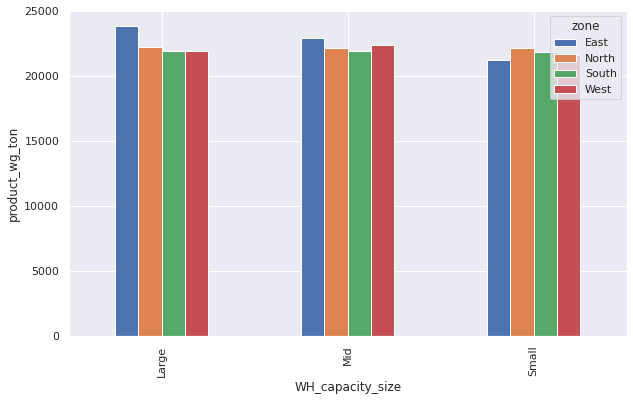

In [ ]:
ct = pd.crosstab(index = listings['WH_capacity_size'],columns=listings['zone'], values=listings['product_wg_ton'],margins=True,aggfunc='mean')

ct.drop('All',inplace = True)

ct.drop('All',axis = 1,inplace = True)

ct.plot.bar(figsize = (10,6))

plt.ylabel("product_wg_ton")

plt.show()

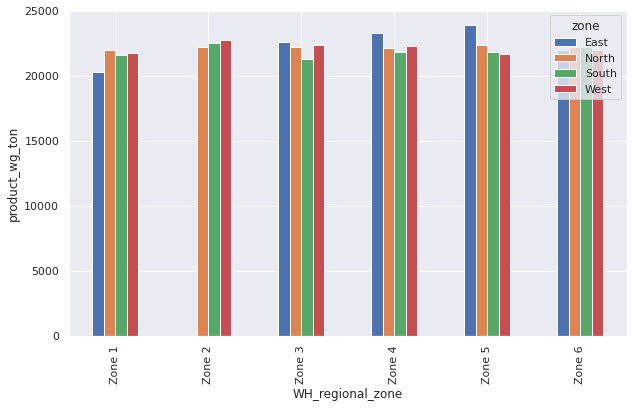

In [ ]:
ct = pd.crosstab(index = listings['WH_regional_zone'],columns=listings['zone'], values=listings['product_wg_ton'],margins=True,aggfunc='mean')

ct.drop('All',inplace = True)

ct.drop('All',axis = 1,inplace = True)

ct.plot.bar(figsize = (10,6))

plt.ylabel("product_wg_ton")

plt.show()

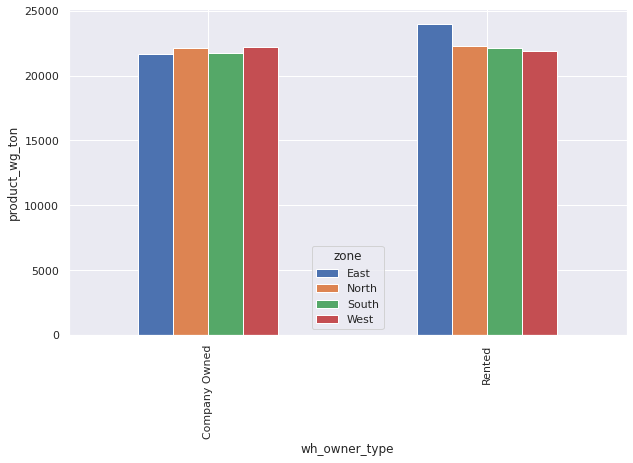

In [ ]:
ct = pd.crosstab(index = listings['wh_owner_type'],columns=listings['zone'], values=listings['product_wg_ton'],margins=True,aggfunc='mean')

ct.drop('All',inplace = True)

ct.drop('All',axis = 1,inplace = True)

ct.plot.bar(figsize = (10,6))

plt.ylabel("product_wg_ton")

plt.show()

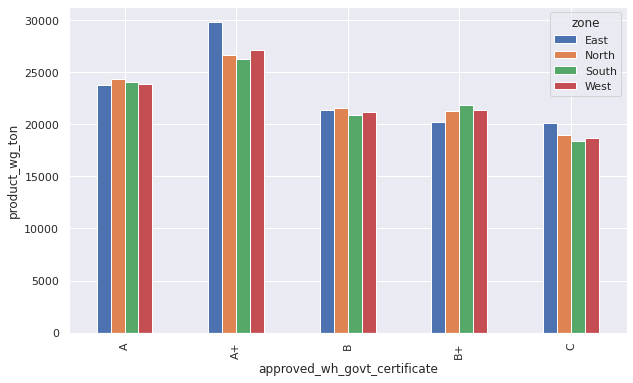

In [ ]:
ct = pd.crosstab(index = listings['approved_wh_govt_certificate'],columns=listings['zone'], values=listings['product_wg_ton'],margins=True,aggfunc='mean')

ct.drop('All',inplace = True)

ct.drop('All',axis = 1,inplace = True)

ct.plot.bar(figsize = (10,6))

plt.ylabel("product_wg_ton")

plt.show()

In [ ]:
corr = df_num.corr(method='pearson')

<ipython-input-71-9c73085bab70>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


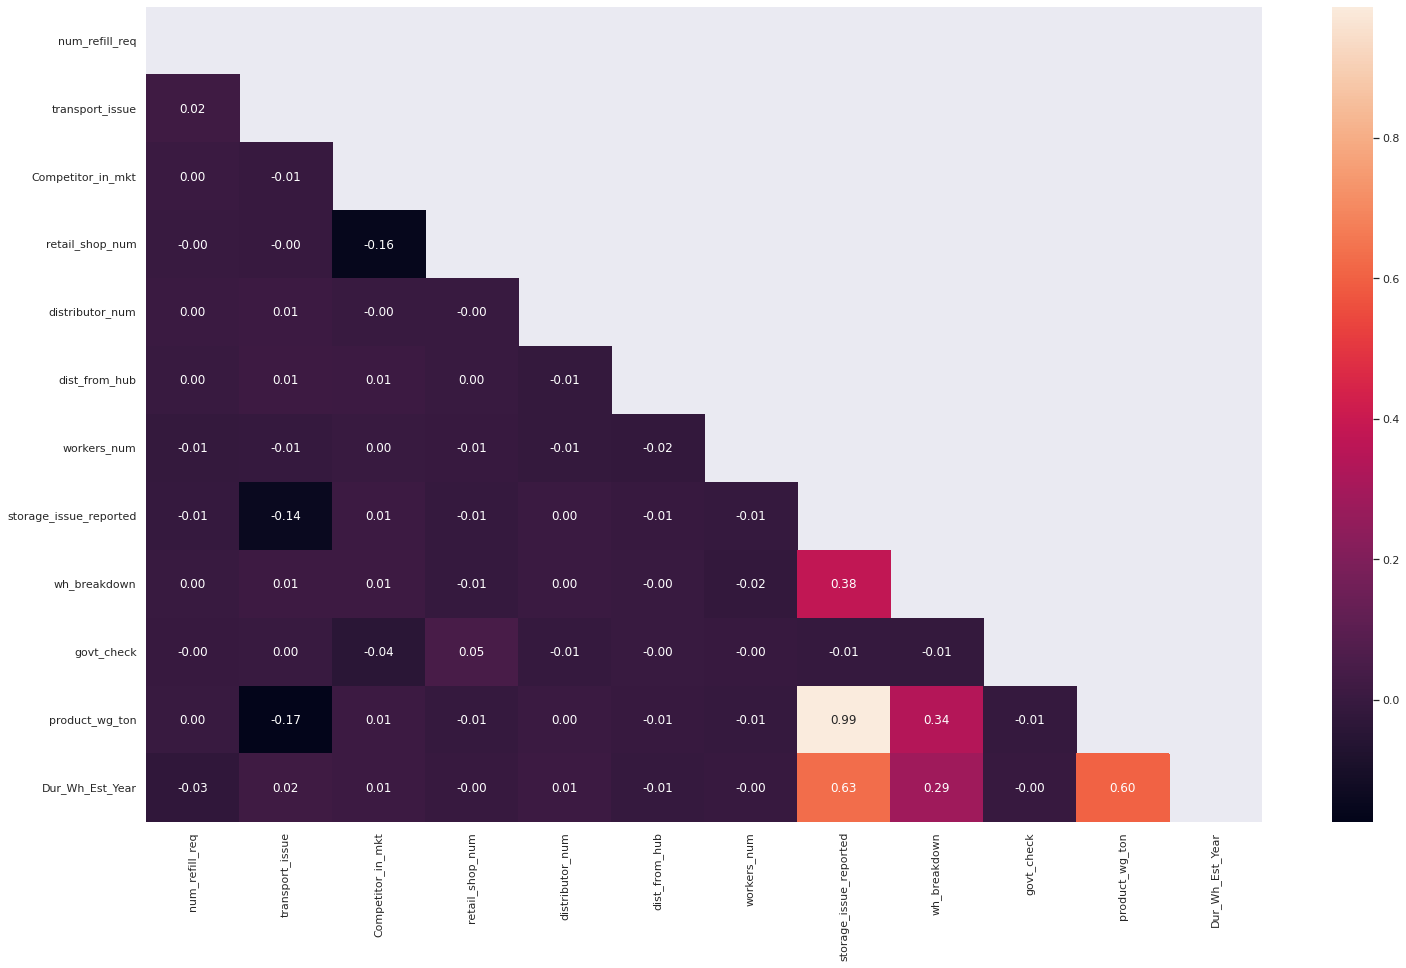

In [ ]:
mask = np.triu(np.ones_like(corr, dtype=np.bool)) 
fig = plt.subplots(figsize=(25, 15))
sns.heatmap(df_num.corr(), annot=True,fmt='.2f',mask=mask)
plt.show()

In [ ]:
#Outlier Treatment

In [ ]:
outlier = ['transport_issue','Competitor_in_mkt','retail_shop_num','workers_num','Dur_Wh_Est_Year']

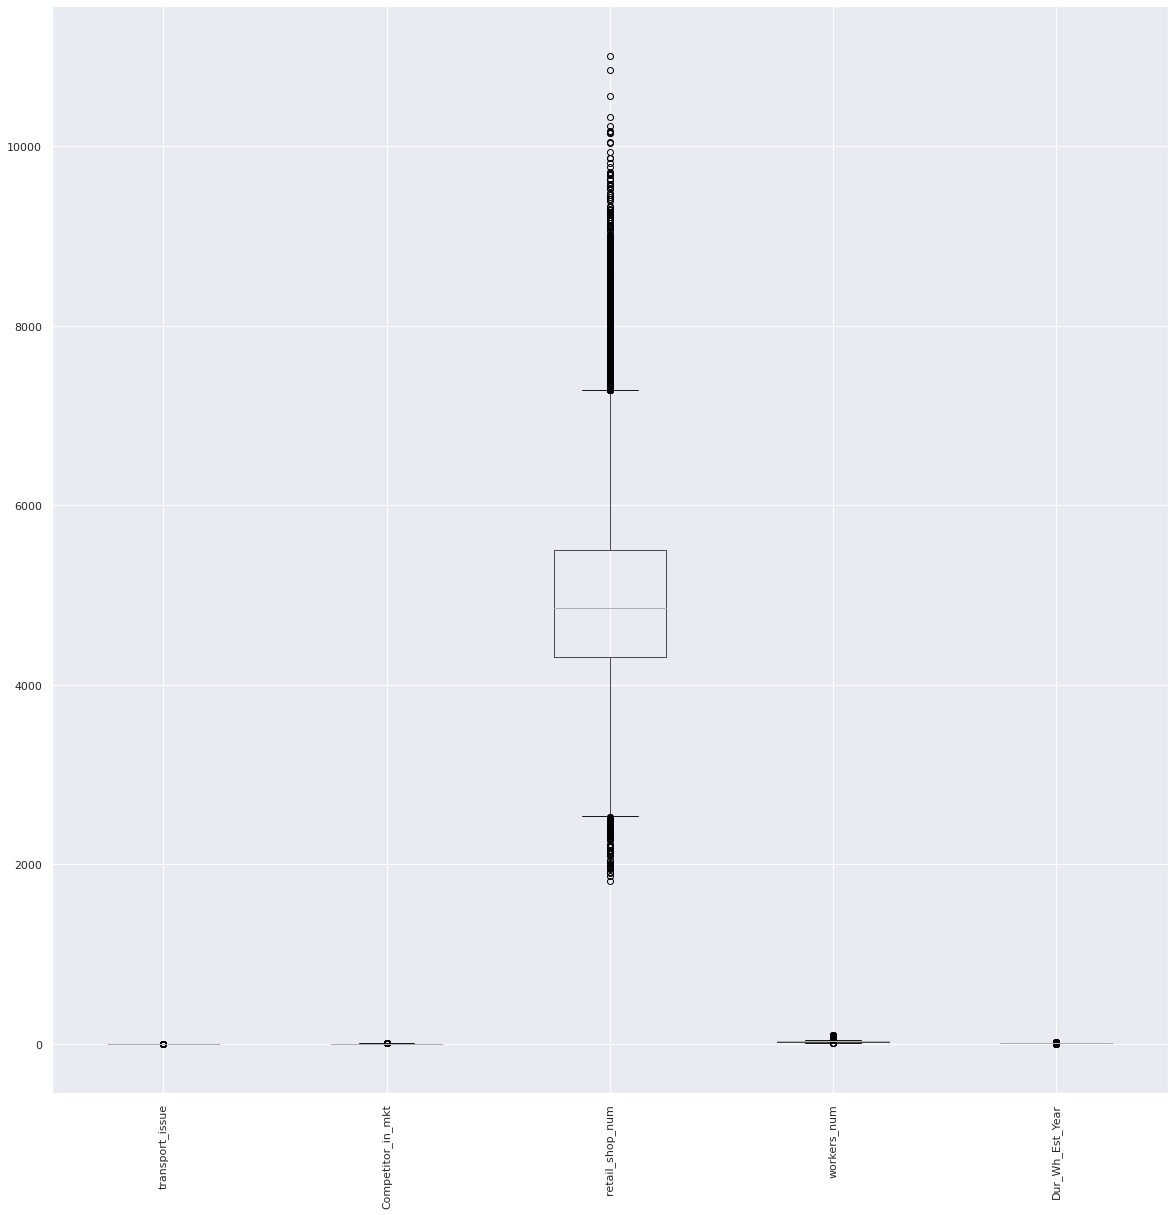

In [ ]:
df_num[outlier].boxplot(figsize=(20,20))
plt.xticks(rotation=90)
plt.show()

In [ ]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [ ]:
lr,ur=remove_outlier(df_num['transport_issue'])
print('Lower Range :',lr,'\nUpper Range :',ur)
df_num['transport_issue']=np.where(df_num['transport_issue']>ur,ur,df_num['transport_issue'])
df_num['transport_issue']=np.where(df_num['transport_issue']<lr,lr,df_num['transport_issue'])
print('')


Lower Range : -1.5 
Upper Range : 2.5



<ipython-input-76-19af53b53e2e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num['transport_issue']=np.where(df_num['transport_issue']>ur,ur,df_num['transport_issue'])
<ipython-input-76-19af53b53e2e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num['transport_issue']=np.where(df_num['transport_issue']<lr,lr,df_num['transport_issue'])


In [ ]:
lr,ur=remove_outlier(df_num['Competitor_in_mkt'])
print('Lower Range :',lr,'\nUpper Range :',ur)
df_num['Competitor_in_mkt']=np.where(df_num['Competitor_in_mkt']>ur,ur,df_num['Competitor_in_mkt'])
df_num['Competitor_in_mkt']=np.where(df_num['Competitor_in_mkt']<lr,lr,df_num['Competitor_in_mkt'])
print('')

Lower Range : -1.0 
Upper Range : 7.0



<ipython-input-77-d9ed6b2912a4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num['Competitor_in_mkt']=np.where(df_num['Competitor_in_mkt']>ur,ur,df_num['Competitor_in_mkt'])
<ipython-input-77-d9ed6b2912a4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num['Competitor_in_mkt']=np.where(df_num['Competitor_in_mkt']<lr,lr,df_num['Competitor_in_mkt'])


In [ ]:
lr,ur=remove_outlier(df_num['retail_shop_num'])
print('Lower Range :',lr,'\nUpper Range :',ur)
df_num['retail_shop_num']=np.where(df_num['retail_shop_num']>ur,ur,df_num['retail_shop_num'])
df_num['retail_shop_num']=np.where(df_num['retail_shop_num']<lr,lr,df_num['retail_shop_num'])
print('')

Lower Range : 2532.5 
Upper Range : 7280.5



<ipython-input-78-20a60ba38077>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num['retail_shop_num']=np.where(df_num['retail_shop_num']>ur,ur,df_num['retail_shop_num'])
<ipython-input-78-20a60ba38077>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num['retail_shop_num']=np.where(df_num['retail_shop_num']<lr,lr,df_num['retail_shop_num'])


In [ ]:
lr,ur=remove_outlier(df_num['workers_num'])
print('Lower Range :',lr,'\nUpper Range :',ur)
df_num['workers_num']=np.where(df_num['workers_num']>ur,ur,df_num['workers_num'])
df_num['workers_num']=np.where(df_num['workers_num']<lr,lr,df_num['workers_num'])
print('')

Lower Range : 10.5 
Upper Range : 46.5



<ipython-input-79-cc53fed26468>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num['workers_num']=np.where(df_num['workers_num']>ur,ur,df_num['workers_num'])
<ipython-input-79-cc53fed26468>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num['workers_num']=np.where(df_num['workers_num']<lr,lr,df_num['workers_num'])


In [ ]:
lr,ur=remove_outlier(df_num['Dur_Wh_Est_Year'])
print('Lower Range :',lr,'\nUpper Range :',ur)
df_num['Dur_Wh_Est_Year']=np.where(df_num['Dur_Wh_Est_Year']>ur,ur,df_num['Dur_Wh_Est_Year'])
df_num['Dur_Wh_Est_Year']=np.where(df_num['Dur_Wh_Est_Year']<lr,lr,df_num['Dur_Wh_Est_Year'])
print('')

Lower Range : 11.5 
Upper Range : 15.5



<ipython-input-80-85f511993c6e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num['Dur_Wh_Est_Year']=np.where(df_num['Dur_Wh_Est_Year']>ur,ur,df_num['Dur_Wh_Est_Year'])
<ipython-input-80-85f511993c6e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num['Dur_Wh_Est_Year']=np.where(df_num['Dur_Wh_Est_Year']<lr,lr,df_num['Dur_Wh_Est_Year'])


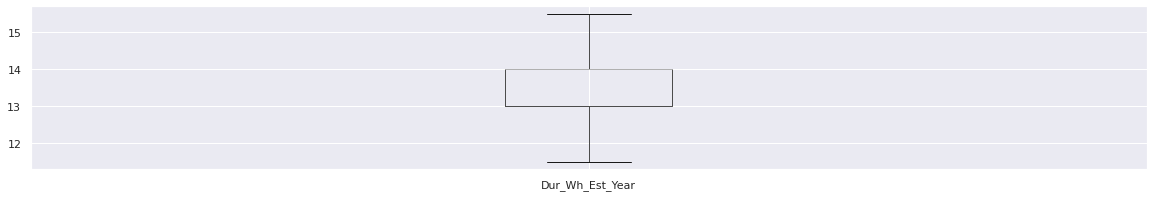

In [ ]:
df_num.boxplot('Dur_Wh_Est_Year',figsize=(20,3))

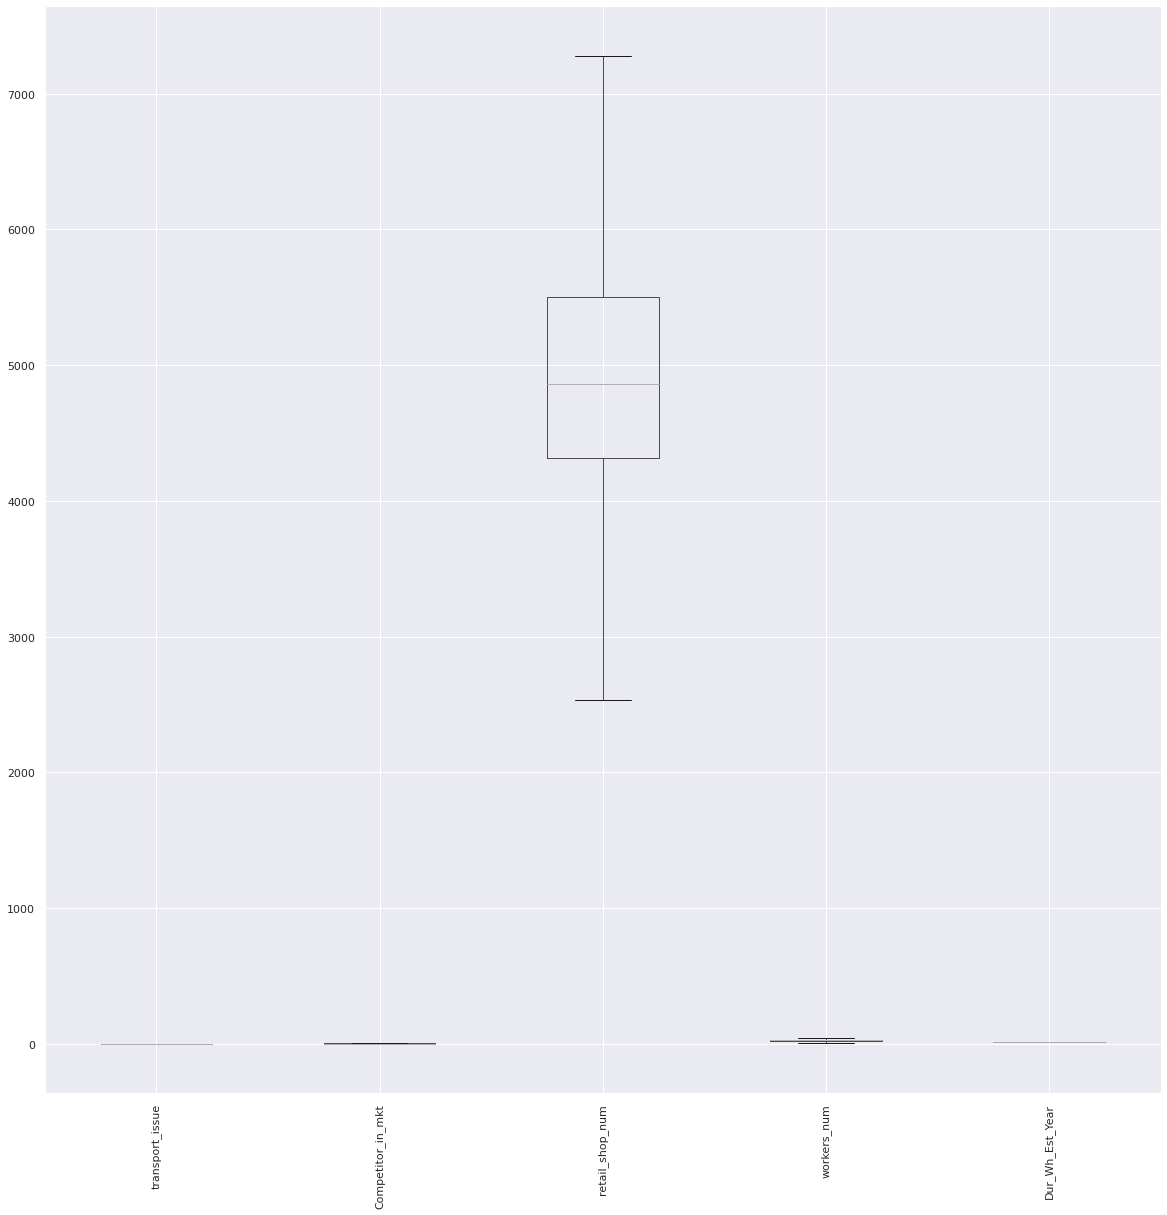

In [ ]:
df_num[outlier].boxplot(figsize=(20,20))
plt.xticks(rotation=90)
plt.show()

In [ ]:
df = pd.concat([df_cat, df_num], axis=1)

In [ ]:
cat1=['Location_type','zone', 'WH_regional_zone',
       'wh_owner_type']

In [ ]:
df_new =pd.get_dummies(df, columns=cat1,drop_first=True)

In [ ]:
df_new

,WH_capacity_size,flood_impacted,flood_proof,electric_supply,temp_reg_mach,approved_wh_govt_certificate,num_refill_req,transport_issue,Competitor_in_mkt,retail_shop_num,distributor_num,dist_from_hub,workers_num,storage_issue_reported,wh_breakdown,govt_check,product_wg_ton,Dur_Wh_Est_Year,Location_type_Urban,zone_North,zone_South,zone_West,WH_regional_zone_Zone 2,WH_regional_zone_Zone 3,WH_regional_zone_Zone 4,WH_regional_zone_Zone 5,WH_regional_zone_Zone 6,wh_owner_type_Rented
0,Small,0,1,1,0,A,3,1.0,2.0,4651.0,24,91,29.0,13,5,15,17115,14.0,1,0,0,1,0,0,0,0,1,1
1,Large,0,0,1,0,A,0,0.0,4.0,6217.0,47,210,31.0,4,3,17,5074,14.0,0,1,0,0,0,0,0,1,0,0
2,Mid,0,0,0,0,A,1,0.0,4.0,4306.0,64,161,37.0,17,6,22,23137,14.0,0,0,1,0,1,0,0,0,0,0
3,Mid,0,0,0,1,A+,7,2.5,2.0,6000.0,50,103,21.0,17,3,27,22115,14.0,0,1,0,0,0,1,0,0,0,1
4,Large,1,0,1,0,C,3,1.0,2.0,4740.0,42,112,25.0,18,6,24,24071,14.0,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,Small,0,0,1,1,A,3,0.0,4.0,5390.0,19,142,34.0,22,2,30,32093,15.5,0,1,0,0,0,0,0,0,0,1
24996,Mid,0,0,1,0,B,6,0.0,4.0,4490.0,57,130,28.0,10,4,18,12114,11.5,0,0,0,1,1,0,0,0,0,0
24997,Large,1,0,1,0,B+,7,0.0,2.0,5403.0,31,147,28.0,23,5,25,27080,14.0,1,0,1,0,0,0,0,1,0,1
24998,Small,0,0,1,0,A,1,0.0,2.0,7280.5,25,60,25.0,18,6,30,25093,14.0,0,1,0,0,0,0,0,0,0,1


In [ ]:
df_new['WH_capacity_size']=df_new['WH_capacity_size'].replace('Small',0)
df_new['WH_capacity_size']=df_new['WH_capacity_size'].replace('Mid',1)
df_new['WH_capacity_size']=df_new['WH_capacity_size'].replace('Large',2)

In [ ]:
df_new['approved_wh_govt_certificate']=df_new['approved_wh_govt_certificate'].replace('A+',5)
df_new['approved_wh_govt_certificate']=df_new['approved_wh_govt_certificate'].replace('A',4)
df_new['approved_wh_govt_certificate']=df_new['approved_wh_govt_certificate'].replace('B+',3)
df_new['approved_wh_govt_certificate']=df_new['approved_wh_govt_certificate'].replace('B',2)
df_new['approved_wh_govt_certificate']=df_new['approved_wh_govt_certificate'].replace('C',1)

In [ ]:
df_new.head()

,WH_capacity_size,flood_impacted,flood_proof,electric_supply,temp_reg_mach,approved_wh_govt_certificate,num_refill_req,transport_issue,Competitor_in_mkt,retail_shop_num,distributor_num,dist_from_hub,workers_num,storage_issue_reported,wh_breakdown,govt_check,product_wg_ton,Dur_Wh_Est_Year,Location_type_Urban,zone_North,zone_South,zone_West,WH_regional_zone_Zone 2,WH_regional_zone_Zone 3,WH_regional_zone_Zone 4,WH_regional_zone_Zone 5,WH_regional_zone_Zone 6,wh_owner_type_Rented
0,0,0,1,1,0,4,3,1.0,2.0,4651.0,24,91,29.0,13,5,15,17115,14.0,1,0,0,1,0,0,0,0,1,1
1,2,0,0,1,0,4,0,0.0,4.0,6217.0,47,210,31.0,4,3,17,5074,14.0,0,1,0,0,0,0,0,1,0,0
2,1,0,0,0,0,4,1,0.0,4.0,4306.0,64,161,37.0,17,6,22,23137,14.0,0,0,1,0,1,0,0,0,0,0
3,1,0,0,0,1,5,7,2.5,2.0,6000.0,50,103,21.0,17,3,27,22115,14.0,0,1,0,0,0,1,0,0,0,1
4,2,1,0,1,0,1,3,1.0,2.0,4740.0,42,112,25.0,18,6,24,24071,14.0,0,1,0,0,0,0,0,1,0,0


In [ ]:
df_new.columns

Index(['WH_capacity_size', 'flood_impacted', 'flood_proof', 'electric_supply',
       'temp_reg_mach', 'approved_wh_govt_certificate', 'num_refill_req',
       'transport_issue', 'Competitor_in_mkt', 'retail_shop_num',
       'distributor_num', 'dist_from_hub', 'workers_num',
       'storage_issue_reported', 'wh_breakdown', 'govt_check',
       'product_wg_ton', 'Dur_Wh_Est_Year', 'Location_type_Urban',
       'zone_North', 'zone_South', 'zone_West', 'WH_regional_zone_Zone 2',
       'WH_regional_zone_Zone 3', 'WH_regional_zone_Zone 4',
       'WH_regional_zone_Zone 5', 'WH_regional_zone_Zone 6',
       'wh_owner_type_Rented'],
      dtype='object')

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
ss=StandardScaler()
df_num_scaled=ss.fit_transform(df_num)

In [ ]:
k_means = KMeans(n_clusters = 2)

In [ ]:
# Data must be given scaled

In [ ]:
k_means.fit(df_num_scaled)

KMeans(n_clusters=2)

In [ ]:
k_means.labels_

array([0, 0, 1, ..., 1, 1, 0], dtype=int32)

In [ ]:
k_means.inertia_

253998.2600991491

In [ ]:
k_means = KMeans(n_clusters = 3)
k_means.fit(df_num_scaled)
k_means.inertia_

236976.6567889577

In [ ]:
wss =[] 

In [ ]:
# data must be scaled

In [ ]:
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(df_num_scaled)
    wss.append(KM.inertia_)

In [ ]:
wss

[299999.9999999996,
 253998.32919274722,
 236976.4954864544,
 224886.0805441463,
 215848.28957302374,
 209472.3523255286,
 203896.93817863683,
 199194.63593591208,
 194628.54273705604,
 190504.18323024595]

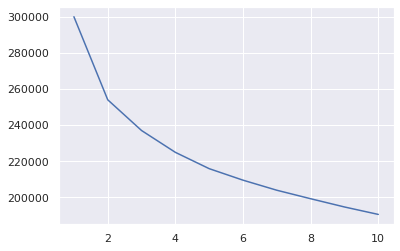

In [ ]:
plt.plot(range(1,11), wss)

In [ ]:
k_means = KMeans(n_clusters = 2)
k_means.fit(df_num_scaled)
labels = k_means.labels_

In [ ]:
listings["Clus_kmeans"] = labels
listings.head(5)

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req,transport_issue,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,storage_issue_reported,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown,govt_check,product_wg_ton,Dur_Wh_Est_Year,Clus_kmeans
0,Urban,Small,West,Zone 6,3,1,2,4651,Rented,24,0,1,1,91,29.0,13,0,A,5,15,17115,14.0,0
1,Rural,Large,North,Zone 5,0,0,4,6217,Company Owned,47,0,0,1,210,31.0,4,0,A,3,17,5074,14.0,0
2,Rural,Mid,South,Zone 2,1,0,4,4306,Company Owned,64,0,0,0,161,37.0,17,0,A,6,22,23137,14.0,1
3,Rural,Mid,North,Zone 3,7,4,2,6000,Rented,50,0,0,0,103,21.0,17,1,A+,3,27,22115,14.0,0
4,Rural,Large,North,Zone 5,3,1,2,4740,Company Owned,42,1,0,1,112,25.0,18,0,C,6,24,24071,14.0,1


In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [ ]:
silhouette_score(df_num_scaled,labels)

0.14114292098686038

In [ ]:
sil_width = silhouette_samples(df_num_scaled,labels)

In [ ]:
listings["sil_width"] = sil_width
listings.head(5)

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req,transport_issue,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,storage_issue_reported,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown,govt_check,product_wg_ton,Dur_Wh_Est_Year,Clus_kmeans,sil_width
0,Urban,Small,West,Zone 6,3,1,2,4651,Rented,24,0,1,1,91,29.0,13,0,A,5,15,17115,14.0,0,0.000350
1,Rural,Large,North,Zone 5,0,0,4,6217,Company Owned,47,0,0,1,210,31.0,4,0,A,3,17,5074,14.0,0,0.155608
2,Rural,Mid,South,Zone 2,1,0,4,4306,Company Owned,64,0,0,0,161,37.0,17,0,A,6,22,23137,14.0,1,0.112178
3,Rural,Mid,North,Zone 3,7,4,2,6000,Rented,50,0,0,0,103,21.0,17,1,A+,3,27,22115,14.0,0,0.014426
4,Rural,Large,North,Zone 5,3,1,2,4740,Company Owned,42,1,0,1,112,25.0,18,0,C,6,24,24071,14.0,1,0.125312


In [ ]:
silhouette_samples(df_num_scaled,labels).min()

-0.026554721767978635

Recommendations based on best model important features:
1.	Wh_owner_type_rented.
2.	Wh_regional_zone_6
3.	Wh_regional_zone_5
4.	Wh_regional_zone_4
#Insight 1. 
 91.25 % warehouses are in rural areas in comparison of rural area has 8.17%.
#Insight 2. 
82 % warehouses are of large & mid type.
#Insight 3: 
North zone & Zone 6 has majority of warehouses.
#Insight 4:
Avg Product wt tone is supplied more to urban area in comparison of rural area
#Recommendation 1: 
Product wt tone should be supplied to be increased for rural area. Those warehouses are in urban areas should managed properly to cater more customer demand.
#Insight 5:
Govt checks are more in zone 3 & zone 4.
#Recommendation 2:
In zone 3 & zone 4,all documents should be maintained properly for audit purposes to avoid unnecessary breakdown.
#Insight 6: 
Warehouse breakdown are more in urban zone than rural zone.
#Recommendation 3: 
Strike from worker, flood, or electrical failure should be taken care properly by respective managers to reduce warehouse breakdowns.
#Insight 7: 
Older warehouses are more in urban area comparison of rural area.
#Recommendation 4:
 Renovation of roofs, pallets and others broken racks etc should be done to avoid unnecessary loss of product.
#Insight 8: 
Transport issues are more in urban areas in comparison of rural area.
#Recommendation 5:
Latest technology could be used like drone to avoid delays. 
#Insight 9:Wh_Regional _Zone 6 has most number of breakdowns than 5 followed by zone 4.
#Recommendation 6: 
In zone 6 specially ,electricity, worker strike & flood failure should be checked & planned in advance to avoid these failure.
#Insight 10:
Company owned warehouses has more numbers of workers than rented whereas supply is same.
#Recommendation 7:
HR manager should refer rented warehouse system as benchmark for company owned warehouse.
#Insight 11:
No of refills are more in urban areas than rural areas.
#Recommendation 8: Transportation system of urban areas must be improved. 
#Insight 12: 
Storage issues are more where product is stored more.
#Recommendation 9: 
Large & medium size specially older warehouses warehouses renovation must be done properly.


#END